In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
print(tf.__version__)

2.6.0


In [ ]:
# ekstrasi file zip datasets
import zipfile
local_zip = 'dataset.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/dataset')
zip_ref.close()

In [ ]:
# membuat image generator (generate dataset untuk memperbanyak dataset)
dir = '/tmp/dataset'
train_datagen = ImageDataGenerator(
    
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split=0.2)

In [ ]:
#generate data gambar menjadi hitam putih dan ukuran 224 x 224
train_generator = train_datagen.flow_from_directory(
    dir,
    color_mode="grayscale",
    target_size =(224,224),
    batch_size =10,
    class_mode = 'categorical',
    shuffle = True,
    subset='training',

)

validation_generator = train_datagen.flow_from_directory(
    dir,
    color_mode="grayscale",
    target_size = (224,224),
    batch_size = 10,
    class_mode = 'categorical',
    shuffle = False,
    subset='validation',

)

Found 680 images belonging to 17 classes.
Found 170 images belonging to 17 classes.


In [ ]:
X_test = []
y_test = []
labels = ['1. d', '2. df', '3. dl','4. ds', '5. dt', '6. dv', '7. dz', '8. cf', '9. ct', '10. cv','11. if','12. iv','13. rf','14. ldr','15. p','16. rh','17. th']

In [ ]:
print (train_generator.class_indices)
labels_txt = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f:
  f.write(labels_txt)

{'1. d': 0, '10. cv': 1, '11. if': 2, '12. iv': 3, '13. rf': 4, '14. ldr': 5, '15. p': 6, '16. rh': 7, '17. th': 8, '2. df': 9, '3. dl': 10, '4. ds': 11, '5. dt': 12, '6. dv': 13, '7. dz': 14, '8. cf': 15, '9. ct': 16}


In [ ]:
!cat labels.txt

1. d
10. cv
11. if
12. iv
13. rf
14. ldr
15. p
16. rh
17. th
2. df
3. dl
4. ds
5. dt
6. dv
7. dz
8. cf
9. ct

In [ ]:
#Arsitektur CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 1)),
    tf.keras.layers.MaxPooling2D((2,2), padding = 'valid'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), padding = 'valid'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), padding = 'valid'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), padding = 'valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation ='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator,
    verbose =2
)

Epoch 1/100
68/68 - 38s - loss: 2.8447 - accuracy: 0.0426 - val_loss: 2.8330 - val_accuracy: 0.0471
Epoch 2/100
68/68 - 7s - loss: 2.6833 - accuracy: 0.1324 - val_loss: 2.2111 - val_accuracy: 0.3000
Epoch 3/100
68/68 - 7s - loss: 1.8430 - accuracy: 0.3603 - val_loss: 1.7977 - val_accuracy: 0.3647
Epoch 4/100
68/68 - 7s - loss: 1.4185 - accuracy: 0.4603 - val_loss: 1.5473 - val_accuracy: 0.4353
Epoch 5/100
68/68 - 7s - loss: 1.1459 - accuracy: 0.5485 - val_loss: 1.4339 - val_accuracy: 0.4706
Epoch 6/100
68/68 - 7s - loss: 0.9683 - accuracy: 0.6235 - val_loss: 1.3790 - val_accuracy: 0.5235
Epoch 7/100
68/68 - 7s - loss: 0.9083 - accuracy: 0.6588 - val_loss: 1.1945 - val_accuracy: 0.5706
Epoch 8/100
68/68 - 7s - loss: 0.8420 - accuracy: 0.6794 - val_loss: 1.2130 - val_accuracy: 0.5529
Epoch 9/100
68/68 - 8s - loss: 0.6704 - accuracy: 0.7441 - val_loss: 1.1969 - val_accuracy: 0.5706
Epoch 10/100
68/68 - 8s - loss: 0.6483 - accuracy: 0.7618 - val_loss: 1.0807 - val_accuracy: 0.5882
Epoch 11

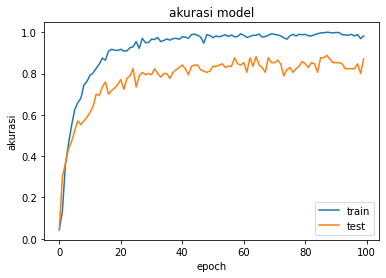

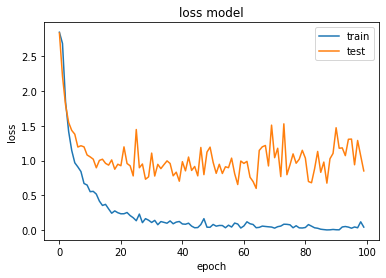

In [ ]:
# visualisasi data akurasi dan loss
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('akurasi model')
plt.ylabel('akurasi')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [ ]:
predictions = model.predict(validation_generator)

In [ ]:
import numpy as np
y_pred = np.argmax(predictions, axis=1)

In [ ]:
print(y_pred.shape, predictions.shape)

(170,) (170, 17)


In [ ]:
y_true = validation_generator.classes
print(y_true[:5], y_pred[:5])

[0 0 0 0 0] [0 0 0 4 0]


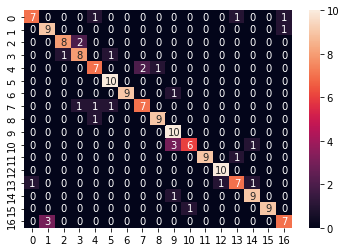

In [ ]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_true, y_pred)
import seaborn as sns
sns.heatmap(cfm, annot=True)

In [ ]:
saved_model_dir = 'save/model'
tf.saved_model.save(model, saved_model_dir)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

In [ ]:
with open('model_unquant.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()

In [ ]:
with open('model_quant.tflite', 'wb') as f:
  f.write(tflite_model)